## **EDA Skills Consolidation with Python: Analyzing the Iris Dataset**

First we will start off with the libraries we need to import to use our Python.

 you can download the Iris dataset from the UCI Machine Learning at: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data.



In [2]:
import pandas as pd # Pandas is a useful library for core data analysis tools, including DataFrames
import numpy as np # numpy gives us fast arithmetic operations, arrays and vectorised operations
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn is a useful library for Data Visualisation
from scipy.stats import skewnorm

In [28]:
# URL for the Iris dataset (iris.data)
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

# Define column names
column_names = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']

# Read the dataset into a Pandas DataFrame
df_iris = pd.read_csv(url, header=None, names=column_names)

# Display the first few rows of the DataFrame
df_iris.head()


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


We can use the describe() method to obtain valuable statistical information about data within our data frame. When dealing with numeric values it provides attributes such as:


*   A count of the amount of items for that variable / column
*   The [mean average](https://simple.wikipedia.org/wiki/Mean) for that variable / column
*   The [standard deviation](https://simple.wikipedia.org/wiki/Standard_deviation) of that column
*   The minimum value found within that variable / column
*   The [percentile values](https://simple.wikipedia.org/wiki/Percentile) for that variable / column (25%, 50%, 75%). For more information on percentiles, see [here](https://www.w3schools.com/python/python_ml_percentile.asp)
*   The maximum value found within that variable / column


In [4]:
# Note how there is no description summary for the Species column?
# Why do you think this is?
df_iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# We can include all columns by using the optional argument include with the value 'all'
df_iris.describe(include='all')

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


## **Statistical Data Types / "Levels" of Measurement**


Steven's levels of measure consist of:
*   Nominal / Categorical
*   Ordinal
*   Interval
*   Ratio

Each "level" of measure allows us to apply more arithmetic operators on the data. It also allows us to better understand what the data actually represents and how it can be manipulated appropriately.

For example, treating  "Eye colour" as a **nominal** variable would allow us to check whether two or more eye colours are equal.
Brown = Hazel?
Hazel != Blue?

But we should not be able to make statements such as:
Brown > Hazel
Blue > Brown

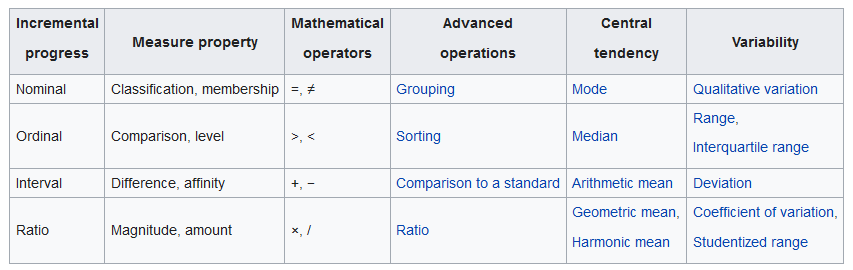



# **Qualitative: Nominal**

Nominal variables (also referred to as categorical variables) are variables that specify a set of values with no intrinsic order.
Examples of nominal variables could be gender, country, species, and so on.

We can plot nominal variables using a [countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html) which is a type of plot that can be thought of as an alternative to a [histogram](https://simple.wikipedia.org/wiki/Histogram) for categorical variables


In [6]:
df_iris["Species"].head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

<Axes: xlabel='count', ylabel='Species'>

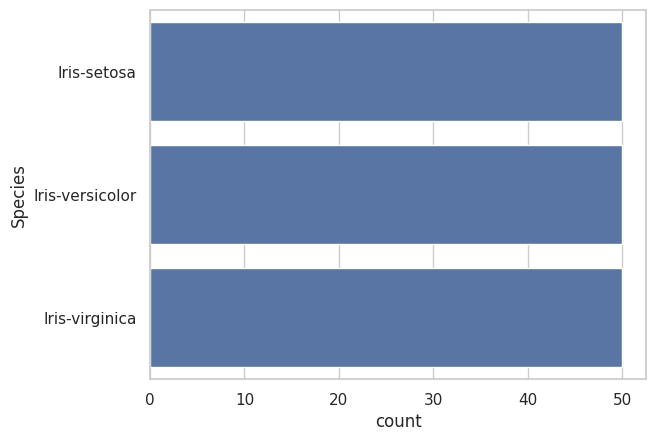

In [12]:
sns.countplot(df_iris["Species"])

<ipython-input-13-eccd75c142a8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Species", data=df_iris, palette="Set2")


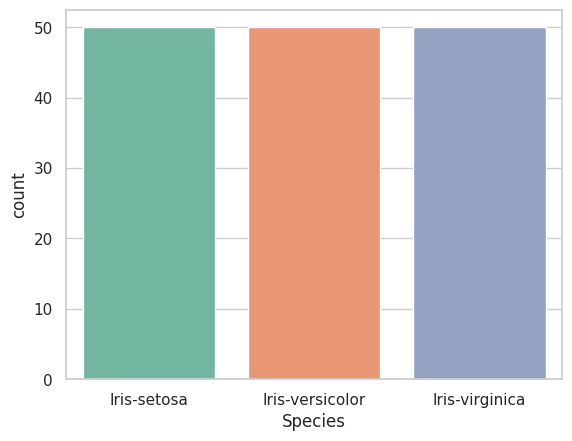

In [13]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a countplot with specified palette
sns.countplot(x="Species", data=df_iris, palette="Set2")

# Show the plot
plt.show()


##**Data Distributions**

One of the best ways to describe a given variable / attribute in a dataset is to report the values that appear within the dataset for that variable / attribute, along with the amount of times each value appears.


We call this way of describing the variable / attribute the "distribution" of that variable / attribute.


#**Histograms**

The most common visual representation of a distribution is a "histogram", which is a chart that shows the frequency ("count") of each value for that given variable / attribute.

<Axes: xlabel='SepalLength', ylabel='Count'>

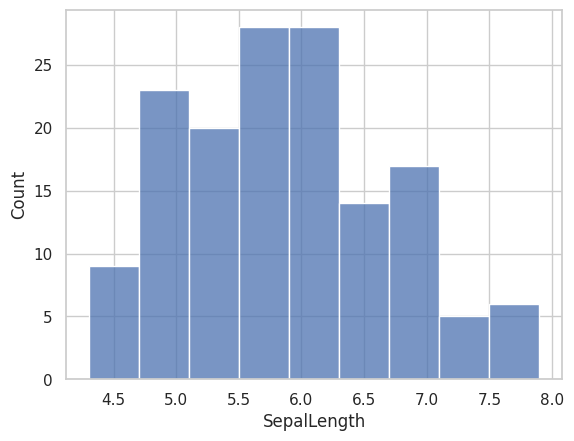

In [10]:
sns.histplot(df_iris["SepalLength"])

<Axes: xlabel='SepalLength', ylabel='Count'>

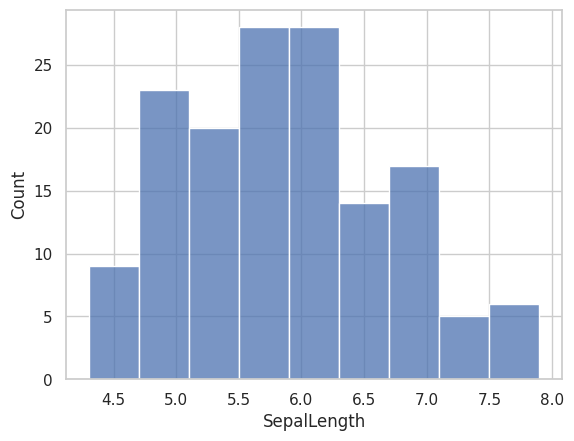

In [11]:
# We can also write the above as:
sns.histplot(df_iris, x="SepalLength")

<Axes: xlabel='SepalWidth', ylabel='Count'>

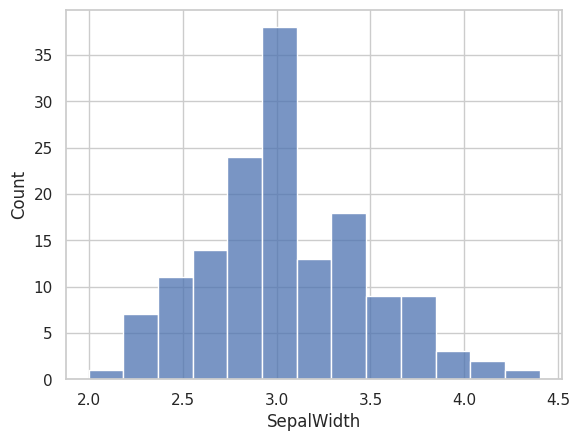

In [14]:
sns.histplot(df_iris["SepalWidth"])

<Axes: xlabel='PetalLength', ylabel='Count'>

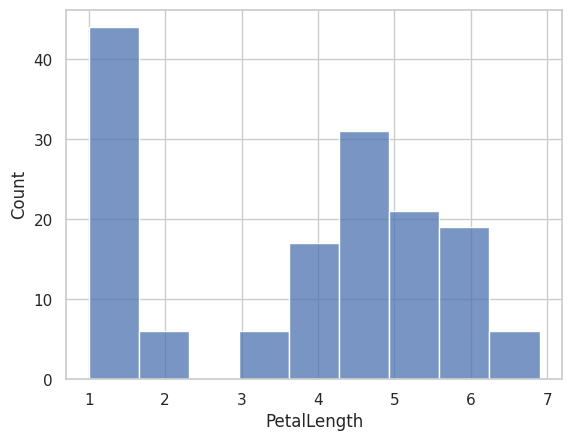

In [15]:
sns.histplot(df_iris["PetalLength"])

<Axes: xlabel='PetalWidth', ylabel='Count'>

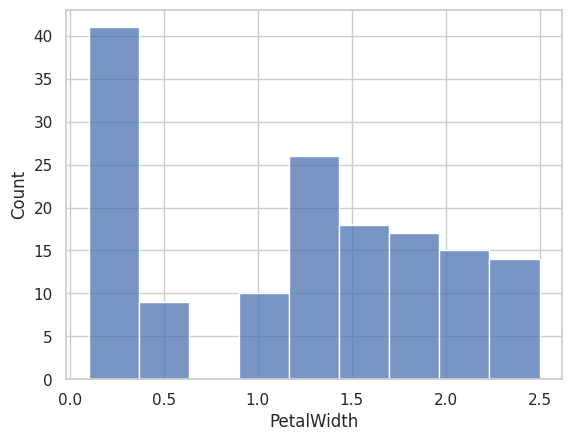

In [16]:
sns.histplot(df_iris["PetalWidth"])

# **Boxplot**

Boxplots (sometimes called "Box and whisker plots" are a standard means of displaying the distribution of data based on a summary consisting of five major points:
* The "minimum" **expected** value, this is not necessarily the smallest value one might find for that variable / attribute
* The first quartile (sometimes called Q1)
* The median
* The third quartile (sometimes called Q3)
* The "maximum" **expected** value, this is not necessarily the largest value one might find for that variable / attribute

"Quartiles" in this case being specific [percentile](https://simple.wikipedia.org/wiki/Percentile) values that are commonly of interest when analysing data. With the 25th, 50th and 75th percentiles being designated as first quartile (Q1), second quartile (median) and third quartile (Q3) respectively.

If you are interested in looking into why the "minimum" and "maximum" expected values are not necessarily the same as the true smallest values in the dataset check out the following article [here](https://builtin.com/data-science/boxplot)

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: SepalLength, dtype: float64

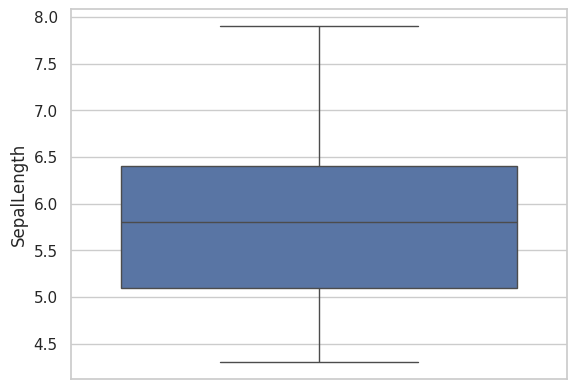

In [17]:
sns.boxplot(df_iris["SepalLength"])
df_iris["SepalLength"].describe()

We can see for the Iris dataset's SepalLength attribute:


*   Q1 (the 25th percentile) is about 5.1 cm
  * 25% of all SepalLengths are less than or equal to 5.1cm
*   Q2 (the median and 50th percentile) is about 5.8 cm
  * 50% of all SepalLengths are less than or equal to 5.8cm
*   Q3 (the 75th percentile) is about 6.5 cm
  * 75% of all SepalLengths are less than or equal to 6.5cm

count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: SepalWidth, dtype: float64

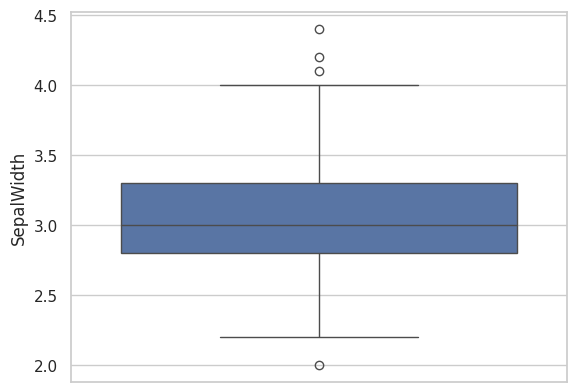

In [18]:
sns.boxplot(df_iris["SepalWidth"])
df_iris["SepalWidth"].describe()

Now things have gotten even more interesting!
The little shapes that we have outside of our boxplots "whiskers" represent "Outliers". These are because they are outside the "minimum" and "maximum" expected range of values for the data.

<Axes: ylabel='PetalLength'>

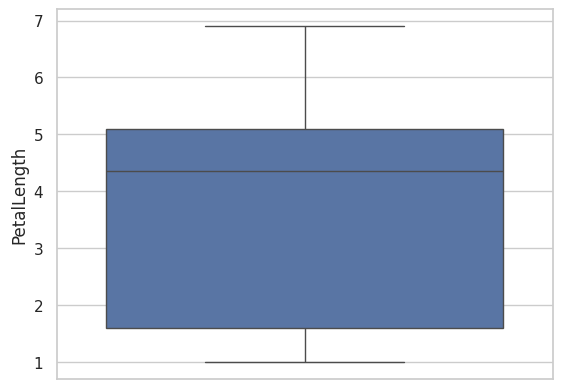

In [19]:
sns.boxplot(df_iris["PetalLength"])

<Axes: ylabel='PetalWidth'>

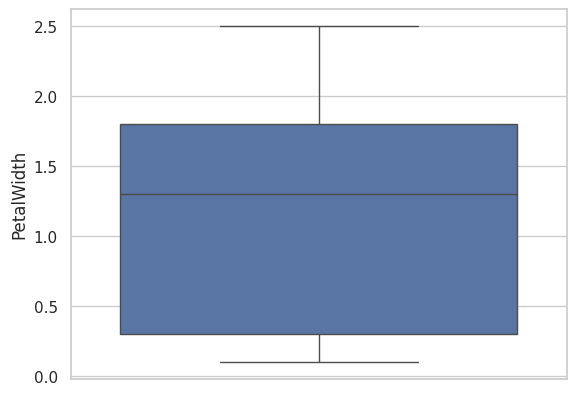

In [20]:
sns.boxplot(df_iris["PetalWidth"])

## **From Univariate to Multivariate analysis**

With multivariate analysis we are analysing multiple variables and how they relate to each other. We tend to start this process of with a **bivariate** analysis, comparing two variables to better understand the relationships between them.

There are numerous ways that we can slice and dice our data to perform bivariate analysis, for example we can use the following plots to gain a greater amount of information about our variables / attributes under question:
*   [Boxplot by category](https://datavizcatalogue.com/methods/box_plot.html) (technically still a Univariate analysis just divided by category)
*   [Scatterplot](https://datavizcatalogue.com/methods/scatterplot.html)
*   [Pairwise plot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

When performing exploratory data analysis for the purpose of building machine learning models, it is often a good rule of thumb to investigate the relationship between our features (the X values, the attributes we will use to train the model) and our target first (the Y values, the attribute 'labels' we will use to train the model). Then, after establishing a good picture of the relationships between each feature and the target we can look at the relationships, **between features**. We tend to analyse things in this order because, based on us trying to build a supervised ML model that utilises features to predict the relevant target value it can help us greatly to understand whether there are any clear, simple to find, patterns with how a given feature might be associated with a target class (for example do certain species of Iris tend to have smaller petals than others?)

For a better understanding of what other visualisations we could choose, have a look at the [Seaborn documentation](https://seaborn.pydata.org/tutorial/introduction.html), the [Seaborn gallery](https://seaborn.pydata.org/examples/index.html) and the [Data Visualisation Catalogue](https://datavizcatalogue.com/search.html)


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn is a useful library for Data Visualisation
from scipy.stats import skewnorm
from sklearn import model_selection

In [29]:
# We'll now use the train-test splitter inside the SKLearn package to give us two subsets of data
# one for training and one for testing, divided into the
# features (the X values) and the targets (the Y values)
# the \ allows us to have a line break in the code
X_train, X_test, Y_train, Y_test = \
  model_selection.train_test_split(df_iris.drop(labels=["Species"], axis='columns'),
                                   df_iris["Species"], random_state=42)

# The dataframe with all our test data
# we will save this for later
df_iris_test = X_test
df_iris_test["Species"] = Y_test

# The dataframe with all our training data
# we will use this for EDA
# and model building
# Note: be careful, the smaller the dataset (in terms of records)
# the more likely that the train and test samples might have larger differences
df_iris_train = X_train
df_iris_train["Species"] = Y_train
df_iris_train

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
4,5.0,3.6,1.4,0.2,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica
85,6.0,3.4,4.5,1.6,Iris-versicolor
86,6.7,3.1,4.7,1.5,Iris-versicolor
...,...,...,...,...,...
71,6.1,2.8,4.0,1.3,Iris-versicolor
106,4.9,2.5,4.5,1.7,Iris-virginica
14,5.8,4.0,1.2,0.2,Iris-setosa
92,5.8,2.6,4.0,1.2,Iris-versicolor


In [30]:
# Note how there is no description summary for the Species column?
# Why do you think this is?
df_iris_train.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,112.000000,112.000000,112.000000,112.000000
mean,5.830357,3.035714,3.808036,1.213393
std,0.819123,0.433892,1.734085,0.749233
min,4.300000,2.000000,1.100000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.700000,4.200000,6.700000,2.500000


In [31]:
# We can include all columns by using the optional argument include with the value 'all'
df_iris_train.describe(include='all')

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
count,112.000000,112.000000,112.000000,112.000000,112
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,39
mean,5.830357,3.035714,3.808036,1.213393,NaN
std,0.819123,0.433892,1.734085,0.749233,NaN
min,4.300000,2.000000,1.100000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.300000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


# **Numerial Feature(s) vs Nominal/ Categorical Target**

<ipython-input-35-a7e1d08fafdc>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Species', y='PetalLength', data=data_for_boxplot, palette=species_palette)


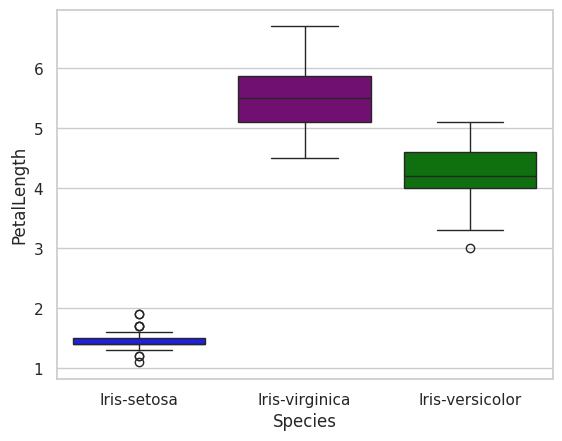

In [35]:
# Combine the relevant columns into a new DataFrame
data_for_boxplot = pd.DataFrame({'PetalLength': df_iris_train['PetalLength'], 'Species': df_iris_train['Species']})

# Set the style of seaborn
sns.set(style="whitegrid")

# Define a color palette for each species
species_palette = {'Iris-setosa': 'blue', 'Iris-versicolor': 'green', 'Iris-virginica': 'purple'}

# Create a boxplot with a specific color for each species
sns.boxplot(x='Species', y='PetalLength', data=data_for_boxplot, palette=species_palette)

# Show the plot
plt.show()



<ipython-input-36-829c023551fc>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Species', y='PetalWidth', data=data_for_boxplot, palette=species_palette)


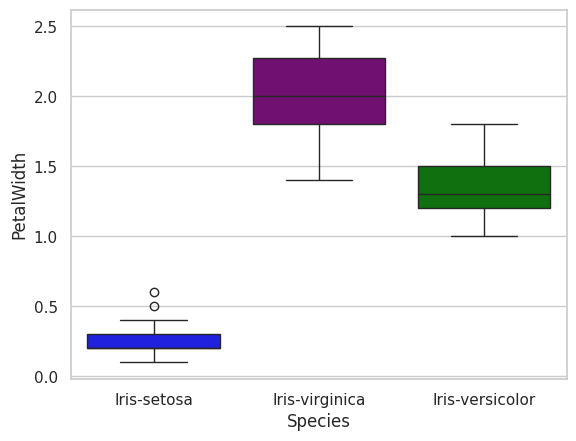

In [36]:
# Combine the relevant columns into a new DataFrame
data_for_boxplot = pd.DataFrame({'PetalWidth': df_iris_train['PetalWidth'], 'Species': df_iris_train['Species']})

# Set the style of seaborn
sns.set(style="whitegrid")

# Define a color palette for each species
species_palette = {'Iris-setosa': 'blue', 'Iris-versicolor': 'green', 'Iris-virginica': 'purple'}

# Create a boxplot with a specific color for each species
sns.boxplot(x='Species', y='PetalWidth', data=data_for_boxplot, palette=species_palette)

# Show the plot
plt.show()



<ipython-input-37-bcfc4ce47da8>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Species', y='SepalLength', data=data_for_boxplot, palette=species_palette)


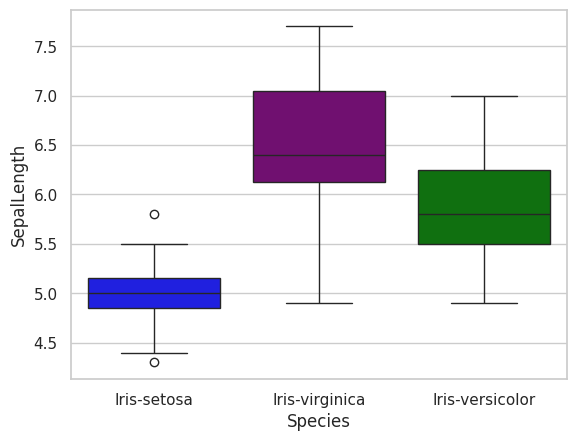

In [37]:
# Combine the relevant columns into a new DataFrame
data_for_boxplot = pd.DataFrame({'SepalLength': df_iris_train['SepalLength'], 'Species': df_iris_train['Species']})

# Set the style of seaborn
sns.set(style="whitegrid")

# Define a color palette for each species
species_palette = {'Iris-setosa': 'blue', 'Iris-versicolor': 'green', 'Iris-virginica': 'purple'}

# Create a boxplot with a specific color for each species
sns.boxplot(x='Species', y='SepalLength', data=data_for_boxplot, palette=species_palette)

# Show the plot
plt.show()


<ipython-input-38-2274b88334f6>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Species', y='SepalWidth', data=data_for_boxplot, palette=species_palette)


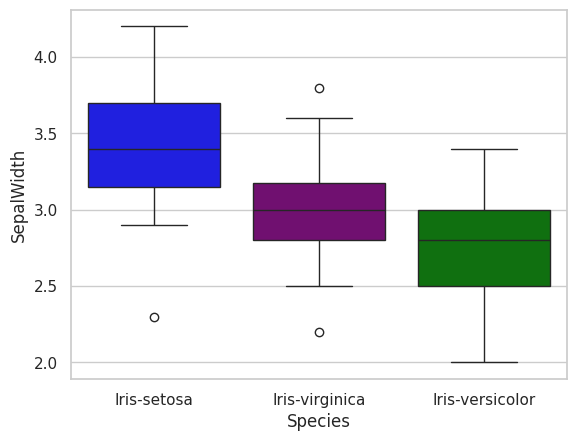

In [38]:
# Combine the relevant columns into a new DataFrame
data_for_boxplot = pd.DataFrame({'SepalWidth': df_iris_train['SepalWidth'], 'Species': df_iris_train['Species']})

# Set the style of seaborn
sns.set(style="whitegrid")

# Define a color palette for each species
species_palette = {'Iris-setosa': 'blue', 'Iris-versicolor': 'green', 'Iris-virginica': 'purple'}

# Create a boxplot with a specific color for each species
sns.boxplot(x='Species', y='SepalWidth', data=data_for_boxplot, palette=species_palette)

# Show the plot
plt.show()


# **Feature(s) vs Feature(s)**
Let's now compare features with each other, in this case we will be comparing numeric features against each other (because all of Iris' non-target variables / attributes are numeric, specifically **ratio** variables)

<Axes: xlabel='SepalLength', ylabel='SepalWidth'>

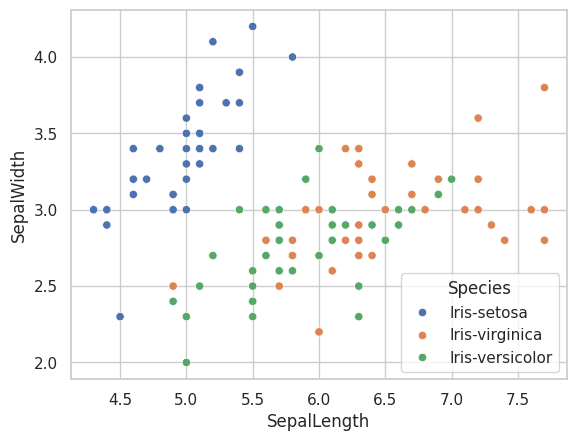

In [39]:
sns.scatterplot(x='SepalLength', y='SepalWidth',
                hue='Species', data=df_iris_train)

The above scatterplot seems to suggest that:
* Setosa has smaller sepal lengths but larger sepal widths than the other species in the sample
*Versicolor is roughly in the middle of the other two species in the sample in terms of their sepal length and width, with some overlap
* Virginica tends to have greater sepal lengths but smaller sepal widths than setosa

<Axes: xlabel='PetalLength', ylabel='PetalWidth'>

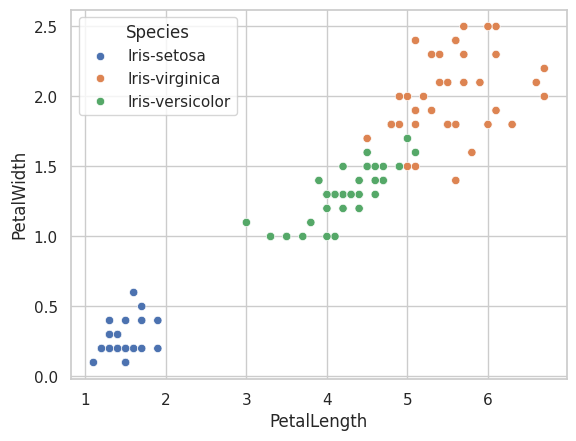

In [40]:
sns.scatterplot(x='PetalLength', y='PetalWidth',
                hue='Species', data=df_iris_train)

The above scatterplot seems to suggest that:
* Setosa has far smaller petal lengths and widths than the other two species in the sample
* Versicolor again seems to lie roughly in the middle of the other two species within the sample in terms of its petal length and width
* Virginica has the largest of petal lengths and widths of the species in the sample


*We* can also produce a [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) that contains scatter graphs comparing each variable as well as a plot of the data distribution per Species

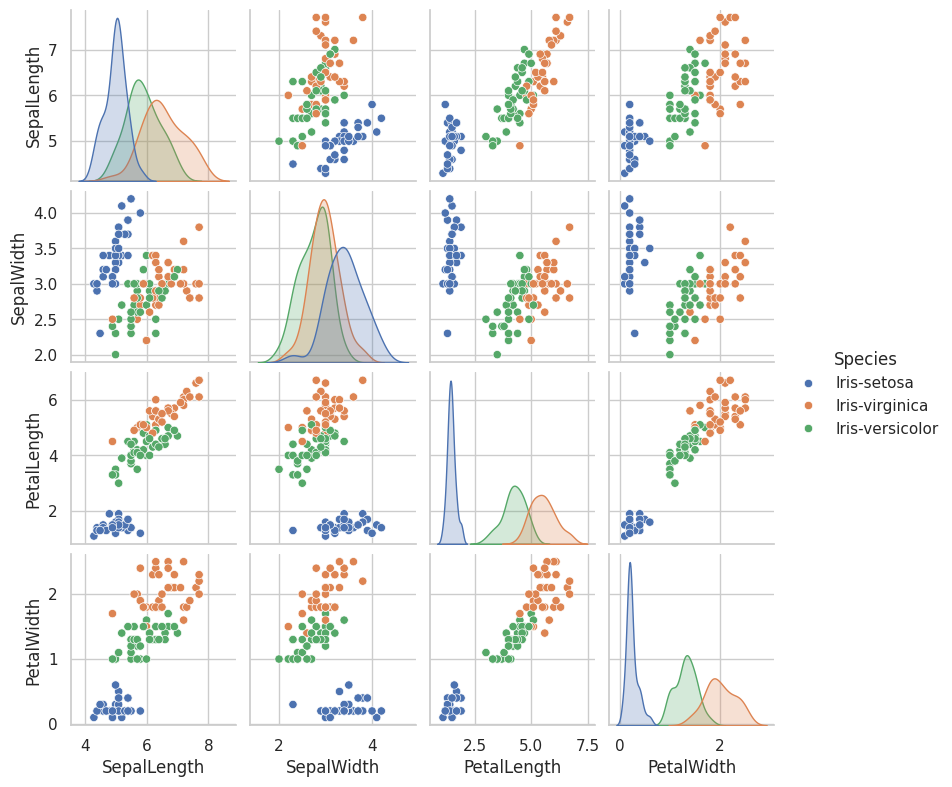

In [41]:
sns.pairplot(df_iris_train,
             hue='Species', height=2)

##**Correlation analysis**

[Correlation](https://simple.wikipedia.org/wiki/Correlation) is a measure of the degree to which two variables/attributes possess a linearl relationship. This is very important step in exploratory data analysis of bivariate data. In the broadest sense correlation is actually any statistical relationship, whether [causal](https://simple.wikipedia.org/wiki/Causality) or not, between two variables.

Pandas provides three measures of correlation that can be calculated on dataframes:


*   [Pearson's correlation](https://simple.wikipedia.org/wiki/Pearson_correlation_coefficient)
*   [Spearman's](https://simple.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient) rank correlation
*   Kendall's [rank correlation](https://simple.wikipedia.org/wiki/Rank_correlation)


Pearson's is the standard measure of correlation to identify linear relationships between variables and will be the primary focus of our investigation examples currently.

In [42]:
# We can find the pairwise correlation of all attributes in the dataframe by using the corr method
# We will select pearson correlation to see if there are any simple
# linear relationships that can be identified amongst variables
df_iris_corr = df_iris_train.corr(method='pearson')
df_iris_corr

<ipython-input-42-b9067ea7b0b1>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_iris_corr = df_iris_train.corr(method='pearson')


,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.061632,0.860562,0.794813
SepalWidth,-0.061632,1.000000,-0.383181,-0.316023
PetalLength,0.860562,-0.383181,1.000000,0.960011
PetalWidth,0.794813,-0.316023,0.960011,1.000000


<Axes: >

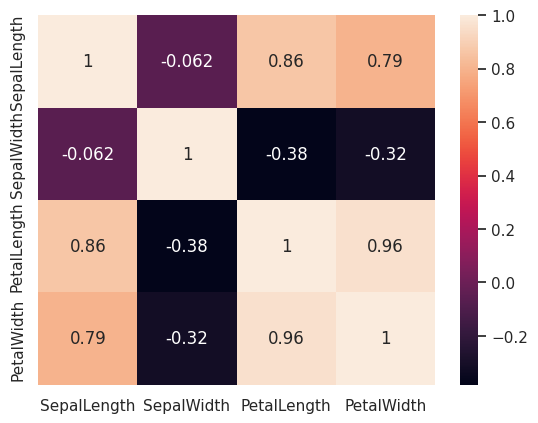

In [43]:
# We can generate a heatmap to visualise the pairwise correlations of these variables
# The diagonal gives us a pearson correlation of '1'
# which shows that the variables are perfectly correlated
# this is to be expected as we are comparing variables agains themselves

# The highly correlated variables
# (assuming that "high correlation" means a pearson value of >= 0.7)
# are:
# Petal Length and Petal Width
# Sepal Length and Petal Length
# Sepal Length and Petal Width
sns.heatmap(df_iris_corr, annot=True)